# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

**Who:**  
- NFL Coaches & Medical Staff – Identify injury patterns and develop player safety strategies.  
- Sports Analysts & Journalists – Report on injury trends and their impact on the game.  
- NFL Fans & Advocacy Groups – Understand player safety concerns, especially regarding concussions.  

**What:**  
- Which positions are most at risk for concussions.  
- The trend of concussions across different seasons.  
- The impact of concussions on player availability (e.g., games missed, weeks injured).  
- Whether certain teams or seasons show a higher frequency of concussions.  

**How:**  
- Stacked bar chart to show concussion injuries by position.  
- Line graph to illustrate concussion trends over multiple seasons.  
- Heatmap to compare teams with the highest concussion incidents.  
- Annotations to highlight key insights (e.g., spikes in concussions for certain positions or seasons).  
- Brief narrative connecting findings to broader concerns about player safety and rule changes in the NFL.  


# 3. Homework - work with your own data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [11]:
import pandas as pd

file_path = '/Users/chrismckee/Downloads/nfl_concussion_injuries_2012_2014.xls'

nfl_df = pd.read_csv(file_path)

nfl_df.head()

,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson - Washington Redskins vs. Tam...,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker - Tennessee Titans vs. San Diego C...,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin - Houston Texans vs. Buffalo ...,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork - New England Patriots vs. Buffalo...,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
4,Lorenzo Booker - Chicago Bears vs. Indianapoli...,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,0,Did not return from injury,NaN


In [12]:
nfl_df.describe()

,Week of Injury,Weeks Injured,Games Missed,Total Snaps
count,392.000000,392.000000,361.000000,392.000000
mean,8.548469,0.920918,0.925208,32.038265
std,5.004111,0.270211,1.742429,22.228552
min,1.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,14.000000
50%,9.000000,1.000000,0.000000,29.000000
75%,13.000000,1.000000,1.000000,48.000000
max,19.000000,1.000000,14.000000,93.000000


In [13]:
nfl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              392 non-null    object 
 1   Player                          392 non-null    object 
 2   Team                            392 non-null    object 
 3   Game                            392 non-null    object 
 4   Date                            392 non-null    object 
 5   Opposing Team                   392 non-null    object 
 6   Position                        392 non-null    object 
 7   Pre-Season Injury?              392 non-null    object 
 8   Winning Team?                   392 non-null    object 
 9   Week of Injury                  392 non-null    int64  
 10  Season                          392 non-null    object 
 11  Weeks Injured                   392 non-null    int64  
 12  Games Missed                    361 

In [15]:
duplicates = nfl_df[nfl_df.duplicated()]
duplicates

,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury


In [18]:
duplicates_all_cols = nfl_df[nfl_df.duplicated(subset=nfl_df.columns.tolist())]
duplicates_all_cols

,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury


In [24]:
mean_vals = nfl_df.mean(numeric_only=True)
mean_vals

median_vals = nfl_df.median(numeric_only=True)
median_vals

mode_vals = nfl_df.mode().iloc[0]
mode_vals

print(mean_vals)
print(median_vals)
print(mode_vals)

Week of Injury     8.548469
Weeks Injured      0.920918
Games Missed       0.925208
Total Snaps       32.038265
dtype: float64
Week of Injury     9.0
Weeks Injured      1.0
Games Missed       0.0
Total Snaps       29.0
dtype: float64
ID                                A.J. Jefferson - Minnesota Vikings vs. Chicago...
Player                                                                   Alex Smith
Team                                                             Cincinnati Bengals
Game                              Cincinnati Bengals vs. Baltimore Ravens (7/9/2...
Date                                                                      2/12/2012
Opposing Team                                                         Chicago Bears
Position                                                                  Comerback
Pre-Season Injury?                                                               No
Winning Team?                                                                    No
Week of In

In [25]:
missing_vals = nfl_df.isnull().sum()
missing_vals

ID                                 0
Player                             0
Team                               0
Game                               0
Date                               0
Opposing Team                      0
Position                           0
Pre-Season Injury?                 0
Winning Team?                      0
Week of Injury                     0
Season                             0
Weeks Injured                      0
Games Missed                      31
Unknown Injury?                    0
Reported Injury Type               3
Total Snaps                        0
Play Time After Injury            43
Average Playtime Before Injury    51
dtype: int64

In [30]:
nfl_df[nfl_df["Games Missed"].isnull()].head(10)

,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
4,Lorenzo Booker - Chicago Bears vs. Indianapoli...,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,0,Did not return from injury,NaN
5,Austin Collie - Chicago Bears vs. Indianapolis...,Austin Collie,Indianapolis Colts,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Chicago Bears,Wide Receiver,Yes,No,1,2012/2013,0,NaN,No,Head,0,NaN,NaN
6,Ramon Harewood - Houston Texans vs. Baltimore ...,Ramon Harewood,Baltimore Ravens,Houston Texans vs. Baltimore Ravens (21/10/2012),21/10/2012,Houston Texans,Offensive Tackle,No,No,7,2012/2013,0,NaN,Yes,Head,0,NaN,NaN
7,James Carpenter - Seattle Seahawks vs. Minneso...,James Carpenter,Seattle Seahawks,Seattle Seahawks vs. Minnesota Vikings (4/11/2...,4/11/2012,Minnesota Vikings,Guard,No,Yes,9,2012/2013,0,NaN,Yes,Illness,0,NaN,NaN
8,David Reed - Indianapolis Colts vs. Oakland Ra...,David Reed,Indianapolis Colts,Indianapolis Colts vs. Oakland Raiders (8/9/2013),8/09/2013,Oakland Raiders,Wide Receiver,Yes,Yes,1,2013/2014,0,NaN,No,Concussion,0,14 downs,NaN
9,Brandon Ghee - Chicago Bears vs. Cincinnati Be...,Brandon Ghee,Cincinnati Bengals,Chicago Bears vs. Cincinnati Bengals (8/9/2013),8/09/2013,Chicago Bears,Comerback,Yes,No,1,2013/2014,0,NaN,No,Concussion,0,37 downs,NaN
10,Pat Angerer - Indianapolis Colts vs. Oakland R...,Pat Angerer,Indianapolis Colts,Indianapolis Colts vs. Oakland Raiders (8/9/2013),8/09/2013,Oakland Raiders,Linebacker,Yes,Yes,1,2013/2014,0,NaN,No,Concussion,0,NaN,NaN
11,Darryl Sharpton - Houston Texans vs. San Diego...,Darryl Sharpton,Houston Texans,Houston Texans vs. San Diego Chargers (9/9/2013),9/09/2013,San Diego Chargers,Linebacker,Yes,Yes,1,2013/2014,0,NaN,No,Concussion,0,NaN,NaN
12,Demetri Goodson - Seattle Seahawks vs. Green B...,Demetri Goodson,Green Bay Packers,Seattle Seahawks vs. Green Bay Packers (4/9/2014),4/09/2014,Seattle Seahawks,Comerback,Yes,No,1,2014/2015,0,NaN,No,Concussion,0,2 downs,NaN
13,James Wright - Cincinnati Bengals vs. Baltimor...,James Wright,Cincinnati Bengals,Cincinnati Bengals vs. Baltimore Ravens (7/9/2...,7/09/2014,Baltimore Ravens,Wide Receiver,Yes,Yes,1,2014/2015,0,NaN,No,Concussion,0,NaN,NaN


In [36]:
# df_negative = nfl_df[nfl_df["Games Missed"] < 0]
# print(df_negative)

nfl_df.head()


,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson - Washington Redskins vs. Tam...,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker - Tennessee Titans vs. San Diego C...,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin - Houston Texans vs. Buffalo ...,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork - New England Patriots vs. Buffalo...,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
4,Lorenzo Booker - Chicago Bears vs. Indianapoli...,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,0,Did not return from injury,NaN


In [39]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(nfl_df, drop_first=True)

# Display the transformed dataframe
print(df_encoded.head())

   Week of Injury  Weeks Injured  Games Missed  Total Snaps  \
0               4              1           1.0            0   
1               3              1           1.0            0   
2               4              1           1.0            0   
3               6              1           1.0            0   
4               1              0           NaN            0   

   ID_A.J. Jenkins - Tennessee Titans vs. Kansas City Chiefs (7/9/2014)  \
0                                              False                      
1                                              False                      
2                                              False                      
3                                              False                      
4                                              False                      

   ID_Aaron Williams - Buffalo Bills vs. Chicago Bears (7/9/2014)  \
0                                              False                
1                               

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

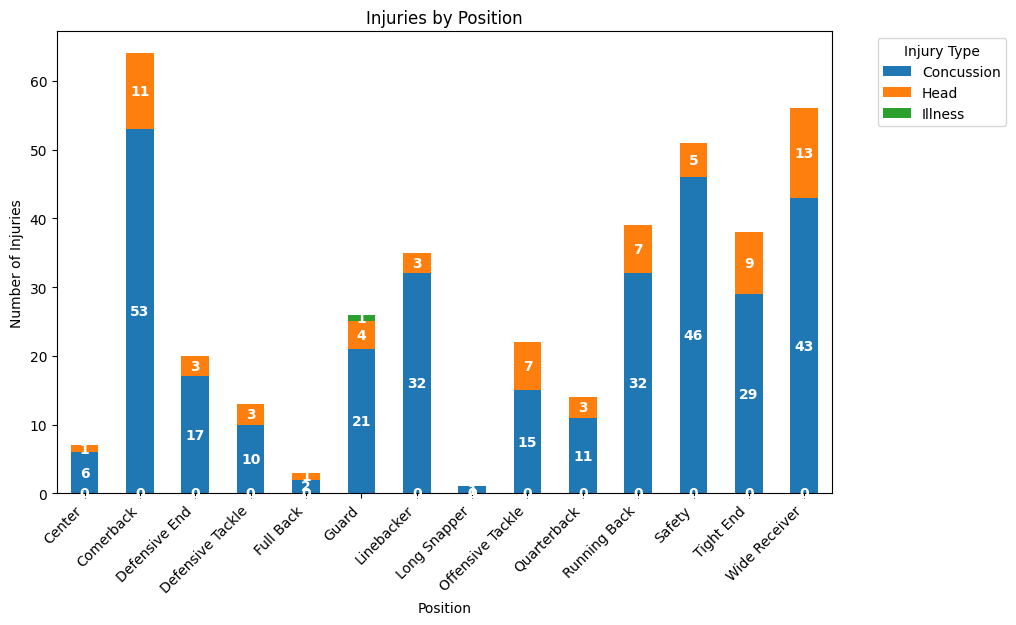

In [46]:
import matplotlib.pyplot as plt

injuries_by_position = nfl_df.groupby("Position")["Reported Injury Type"].value_counts().unstack(fill_value=0)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = injuries_by_position.plot(kind="bar", stacked=True, ax=ax)

# Formatting
plt.xlabel("Position")
plt.ylabel("Number of Injuries")
plt.title("Injuries by Position")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Injury Type", bbox_to_anchor=(1.05, 1), loc="upper left")

for container in bars.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center', fontsize=10, color="white", weight="bold")

# Show the plot
plt.show()

Test for git commit

Another test

Another git test